A great tool to use to indicate if the total stock market is on a discount, only minus would be the you are typically one day behind. However, this is a great tool to use for long-term investing. If there is a buy signal, check your potential stocks and choose what is best to you knowling that you have this knowledge. 

Code to fetch the insider data properly

In [1]:
import requests
import pandas as pd
from datetime import datetime

def fetch_insider_data():
    url = 'http://openinsider.com/ps_data.csv'
    response = requests.get(url)
    
    if response.status_code != 200:
        raise Exception("Failed to fetch data from the server")

    data = response.text.splitlines()
    columns = ['filing_date', 'num_purchases', 'num_sales', 'val_purchases', 'val_sales']
    
    data_list = []
    for line in data:
        if line.startswith('Date'):
            continue  # Skip the header line
        if not line.startswith('#') and line.strip():
            values = line.split('\t')
            if len(values) > 1 and values[0] != '000000':
                try:
                    filing_date = datetime.strptime(values[0], '%y%m%d')
                    num_purchases = int(values[1])
                    num_sales = int(values[2])
                    val_purchases = int(values[3])
                    val_sales = int(values[4])
                    data_list.append([filing_date, num_purchases, num_sales, val_purchases, val_sales])
                except ValueError:
                    continue  # Skip lines with invalid date format

    df = pd.DataFrame(data_list, columns=columns)
    return df

# Fetch data and save to CSV
insider_data = fetch_insider_data()
insider_data.to_csv('insider_data.csv', index=False)


In [2]:
import pandas as pd

# Load the insider data CSV file
csv_file_name = "insider_data.csv"  # Replace with the actual name of your CSV file
insider_data = pd.read_csv(csv_file_name, delimiter='\t')

# Display the first few rows of the data
print("First few rows of the insider data:")
print(insider_data.head().to_string(index=False))

# Display the last few rows of the data
print("\nMost recent rows of the insider data:")
print(insider_data.tail().to_string(index=False))


First few rows of the insider data:
filing_date,num_purchases,num_sales,val_purchases,val_sales
                              2003-07-28,76,184,1960,137626
                             2003-07-29,70,272,6576,1548186
                             2003-07-30,75,267,7734,4148056
                          2003-07-31,120,344,282741,1929841
                            2003-08-01,88,266,13067,5303772

Most recent rows of the insider data:
filing_date,num_purchases,num_sales,val_purchases,val_sales
                             2024-08-19,71,258,14409,977745
                             2024-08-20,84,228,39749,292382
                              2024-08-21,54,211,9507,319105
                             2024-08-22,55,231,47553,495211
                            2024-08-23,50,199,12011,1925523


Insider Trading Statistics:

Averages:
Average Number of Purchases: 81.21015728633694
Average Number of Sales: 177.55069168087928
Average Value of Purchases: 178073.32689027858
Average Value of Sales: 684135.246352094

Medians:
Median Number of Purchases: 73.0
Median Number of Sales: 163.0
Median Value of Purchases: 35774.0
Median Value of Sales: 336859.0

Ratios:
Average Ratio (Number of Purchases to Number of Sales): 0.5462603336906021
Average Ratio (Value of Purchases to Value of Sales): 0.8282787576367093

Median Ratio (Number of Purchases to Number of Sales): 0.42443729903536975
Median Ratio (Value of Purchases to Value of Sales): 0.10199906365828192


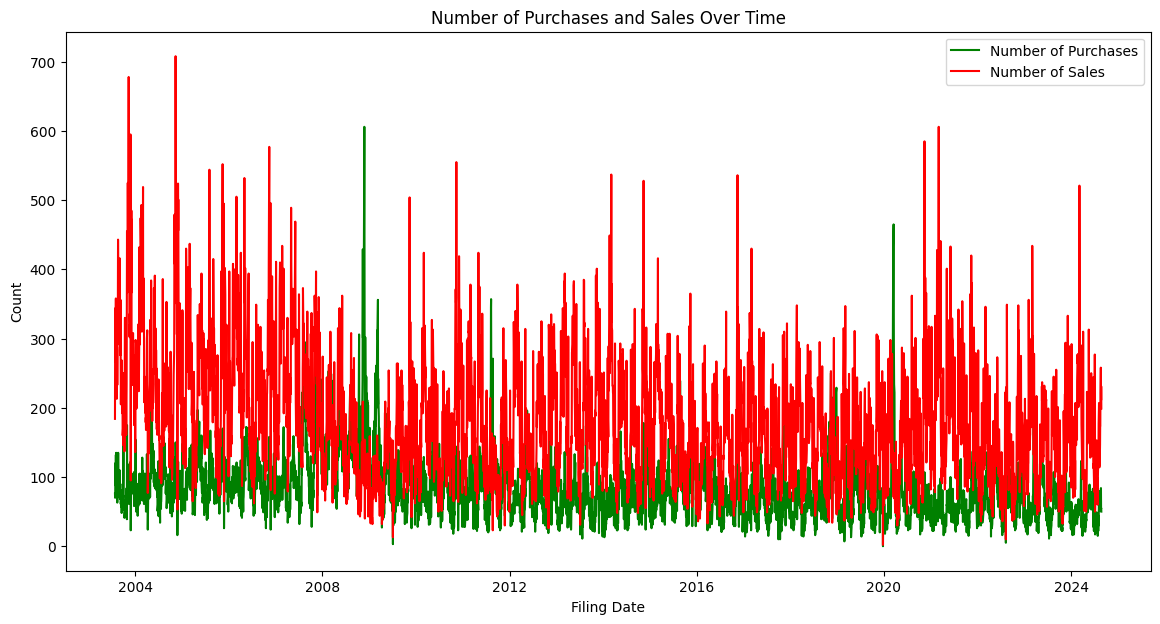

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the insider data CSV file with the correct delimiter
csv_file_name = "insider_data.csv"  # Replace with the actual name of your CSV file
insider_data = pd.read_csv(csv_file_name, delimiter=',')

# Convert filing_date to datetime format
insider_data['filing_date'] = pd.to_datetime(insider_data['filing_date'])

# Convert num_purchases and num_sales to numeric types
insider_data['num_purchases'] = pd.to_numeric(insider_data['num_purchases'])
insider_data['num_sales'] = pd.to_numeric(insider_data['num_sales'])
insider_data['val_purchases'] = pd.to_numeric(insider_data['val_purchases'])
insider_data['val_sales'] = pd.to_numeric(insider_data['val_sales'])

# Calculate the average ratios
average_ratio_number = (insider_data['num_purchases'] / insider_data['num_sales']).mean()
average_ratio_value = (insider_data['val_purchases'] / insider_data['val_sales']).mean()

# Calculate the median ratios
median_ratio_number = (insider_data['num_purchases'] / insider_data['num_sales']).median()
median_ratio_value = (insider_data['val_purchases'] / insider_data['val_sales']).median()

# Calculate statistics (grouped by average and median)
averages = {
    "Average Number of Purchases": insider_data['num_purchases'].mean(),
    "Average Number of Sales": insider_data['num_sales'].mean(),
    "Average Value of Purchases": insider_data['val_purchases'].mean(),
    "Average Value of Sales": insider_data['val_sales'].mean(),
}

medians = {
    "Median Number of Purchases": insider_data['num_purchases'].median(),
    "Median Number of Sales": insider_data['num_sales'].median(),
    "Median Value of Purchases": insider_data['val_purchases'].median(),
    "Median Value of Sales": insider_data['val_sales'].median(),
}

# Print the statistics grouped by average, median, and ratios
print("Insider Trading Statistics:")

print("\nAverages:")
for key, value in averages.items():
    print(f"{key}: {value}")

print("\nMedians:")
for key, value in medians.items():
    print(f"{key}: {value}")

print("\nRatios:")
print(f"Average Ratio (Number of Purchases to Number of Sales): {average_ratio_number}")
print(f"Average Ratio (Value of Purchases to Value of Sales): {average_ratio_value}")

print()  # Line break between average and median ratios

print(f"Median Ratio (Number of Purchases to Number of Sales): {median_ratio_number}")
print(f"Median Ratio (Value of Purchases to Value of Sales): {median_ratio_value}")

# Plot the number of purchases and sales
plt.figure(figsize=(14, 7))
plt.plot(insider_data['filing_date'], insider_data['num_purchases'], label='Number of Purchases', color='green')
plt.plot(insider_data['filing_date'], insider_data['num_sales'], label='Number of Sales', color='red')

# Add title and labels
plt.title('Number of Purchases and Sales Over Time')
plt.xlabel('Filing Date')
plt.ylabel('Count')
plt.legend()

# Display the chart
plt.show()


Using this data we can start to backtest various trading strategies. To start I will backtest a basic buy and hold strategy where we buy when the ratio of Number of Purchases to Number of Sales is above or equal to 1. This can tell us that at that given time, there was more buying occurring than selling. I will use the S&P 500 for this and invest $1000 at the start date of 05/11/2004 which is the first buy signal from the data. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the insider data CSV file with the correct delimiter
csv_file_name = "insider_data.csv"  # Replace with the actual name of your CSV file
insider_data = pd.read_csv(csv_file_name, delimiter=',')

# Convert filing_date to datetime format
insider_data['filing_date'] = pd.to_datetime(insider_data['filing_date'])

# Calculate the ratio of Number of Purchases to Number of Sales
insider_data['purchase_to_sale_ratio'] = insider_data['num_purchases'] / insider_data['num_sales']

# Identify buy signals where the ratio is >= 1
buy_signals = insider_data[insider_data['purchase_to_sale_ratio'] >= 1]

# Display the buy signals
print("Buy Signals:")
print(buy_signals[['filing_date', 'num_purchases', 'num_sales', 'purchase_to_sale_ratio']])


Buy Signals:
     filing_date  num_purchases  num_sales  purchase_to_sale_ratio
197   2004-05-11            216        210                1.028571
241   2004-07-15            113        106                1.066038
553   2005-10-12            101         95                1.063158
554   2005-10-13             77         75                1.026667
555   2005-10-14            110        107                1.028037
...          ...            ...        ...                     ...
4956  2023-05-15            146        137                1.065693
5049  2023-09-27             54         53                1.018868
5068  2023-10-25             37         33                1.121212
5069  2023-10-26             54         46                1.173913
5072  2023-10-31             67         57                1.175439

[475 rows x 4 columns]


[*********************100%%**********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_9204\1742832362.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_signals['filing_date'] = pd.to_datetime(buy_signals['filing_date'])


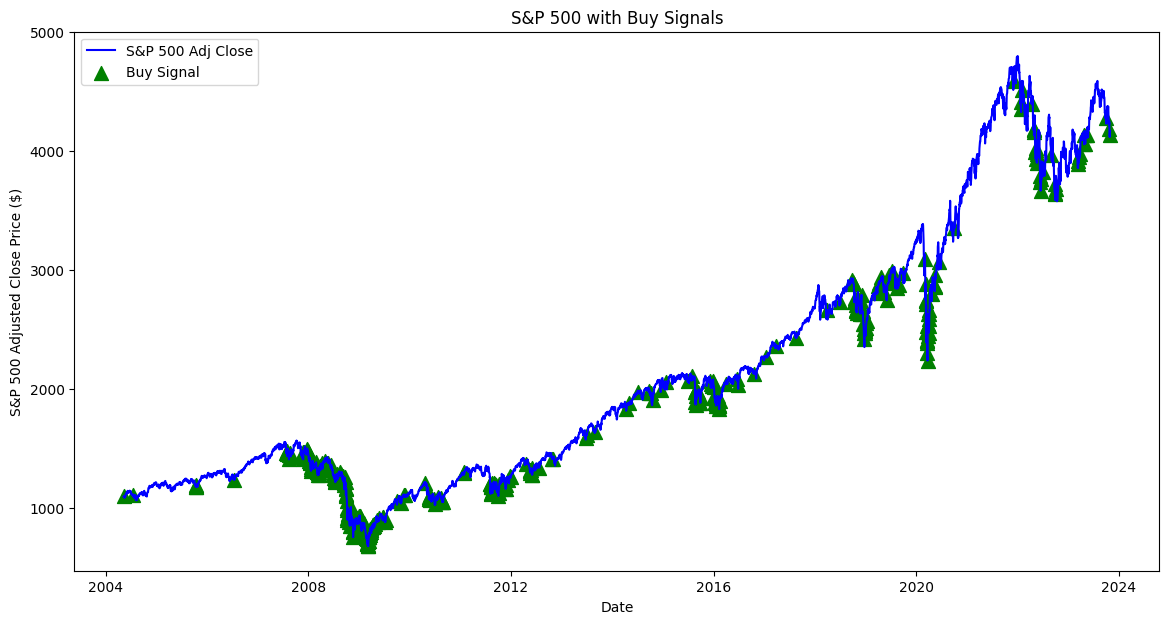

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download S&P 500 data
sp500 = yf.download('^GSPC', start=buy_signals['filing_date'].min(), end=buy_signals['filing_date'].max())

# Ensure 'filing_date' is in datetime format for consistency
buy_signals['filing_date'] = pd.to_datetime(buy_signals['filing_date'])

# Reset index of sp500 to ensure merging on date
sp500.reset_index(inplace=True)

# Drop any existing 'Adj Close' in buy_signals to avoid duplication
if 'Adj Close' in buy_signals.columns:
    buy_signals = buy_signals.drop(columns=['Adj Close'])

# Merge S&P 500 data with buy signals
buy_signals = buy_signals.merge(sp500[['Date', 'Adj Close']], left_on='filing_date', right_on='Date', how='left')

# Plot the S&P 500 adjusted close prices
plt.figure(figsize=(14, 7))
plt.plot(sp500['Date'], sp500['Adj Close'], label='S&P 500 Adj Close', color='blue')

# Highlight buy signals
plt.scatter(buy_signals['filing_date'], buy_signals['Adj Close'], color='green', marker='^', s=100, label='Buy Signal')

# Add title and labels
plt.title('S&P 500 with Buy Signals')
plt.xlabel('Date')
plt.ylabel('S&P 500 Adjusted Close Price ($)')
plt.legend()

# Display the chart
plt.show()


In [6]:
import yfinance as yf
import pandas as pd

# Download S&P 500 data
sp500 = yf.download('^GSPC', start=buy_signals['filing_date'].min(), end=buy_signals['filing_date'].max())

# Ensure 'filing_date' is in datetime format for consistency
buy_signals['filing_date'] = pd.to_datetime(buy_signals['filing_date'])

# Reset index of sp500 to ensure merging on date
sp500.reset_index(inplace=True)

# Drop any existing 'Adj Close' in buy_signals to avoid duplication
if 'Adj Close' in buy_signals.columns:
    buy_signals = buy_signals.drop(columns=['Adj Close'])

# Merge S&P 500 data with buy signals
buy_signals = buy_signals.merge(sp500[['Date', 'Adj Close']], left_on='filing_date', right_on='Date', how='left')

# Drop rows with NaN values in 'Adj Close' after the merge
buy_signals = buy_signals.dropna(subset=['Adj Close'])

# Initialize variables for total return calculation
initial_investment = 1000
total_investment_value = 0
total_investment = 0

# Check if sp500 data has valid 'Adj Close' values
final_price = sp500['Adj Close'].iloc[-1]

if not pd.isna(final_price):
    # Iterate over each buy signal and calculate the investment value at the end
    for index, row in buy_signals.iterrows():
        buy_price = row['Adj Close']
        if not pd.isna(buy_price):
            shares_bought = initial_investment / buy_price
            
            # Value of this investment at the last available S&P 500 price
            investment_value = shares_bought * final_price
            
            # Sum up the total investment and total value
            total_investment_value += investment_value
            total_investment += initial_investment
    
    # Calculate the total return percentage
    total_return_percentage = ((total_investment_value - total_investment) / total_investment) * 100

    print(f"Total Investment: ${total_investment:.2f}")
    print(f"Total Investment Value: ${total_investment_value:.2f}")
    print(f"Total Return Percentage: {total_return_percentage:.2f}%")
else:
    print("Error: The final price data is invalid. Please check the S&P 500 data.")


[*********************100%%**********************]  1 of 1 completed

Total Investment: $473000.00
Total Investment Value: $1474078.00
Total Return Percentage: 211.64%


In [7]:
import yfinance as yf

# Define the ticker for the S&P 500
ticker = '^GSPC'

# Fetch historical data from yfinance
sp500_data = yf.download(ticker, start='2004-05-11', end='2023-10-31')

# Get the first and last available adjusted closing prices
price_start = sp500_data['Adj Close'].iloc[0]
price_end = sp500_data['Adj Close'].iloc[-1]

# Calculate the percentage return
percentage_return = ((price_end - price_start) / price_start) * 100

print(f"Percentage return from 2004-05-11 to 2023-10-31: {percentage_return:.2f}%")


[*********************100%%**********************]  1 of 1 completed

Percentage return from 2004-05-11 to 2023-10-31: 280.38%


In [8]:
import pandas as pd
import yfinance as yf

# Load the insider data CSV file with the correct delimiter
csv_file_name = "insider_data.csv"  # Replace with the actual name of your CSV file
insider_data = pd.read_csv(csv_file_name, delimiter=',')

# Convert filing_date to datetime format
insider_data['filing_date'] = pd.to_datetime(insider_data['filing_date'])

# Calculate the ratio of Number of Purchases to Number of Sales
insider_data['purchase_to_sale_ratio'] = insider_data['num_purchases'] / insider_data['num_sales']

# Identify buy signals where the ratio is >= 1
buy_signals = insider_data[insider_data['purchase_to_sale_ratio'] >= 1]

# Download S&P 500 data from 52 weeks prior to the earliest buy signal to the last buy signal date
start_date = buy_signals['filing_date'].min() - pd.Timedelta(weeks=52)
end_date = buy_signals['filing_date'].max()
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Initialize a list to store the results
results = []

for index, row in buy_signals.iterrows():
    filing_date = row['filing_date']
    
    # Find the highest price in the 52 weeks prior to the filing date
    one_year_prior = filing_date - pd.Timedelta(weeks=52)
    highest_price_52w = sp500[(sp500.index >= one_year_prior) & (sp500.index < filing_date)]['Adj Close'].max()
    
    # Find the price on the filing date
    filing_price = sp500.loc[filing_date]['Adj Close'] if filing_date in sp500.index else None
    
    if filing_price is not None and highest_price_52w is not None:
        # Calculate the discount
        discount = ((highest_price_52w - filing_price) / highest_price_52w) * 100
        
        # Append the data to the results list
        results.append({
            'filing_date': filing_date,
            'num_purchases': row['num_purchases'],
            'num_sales': row['num_sales'],
            'purchase_to_sale_ratio': row['purchase_to_sale_ratio'],
            'filing_price': filing_price,
            'highest_price_52w': highest_price_52w,
            'discount_percentage': discount
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Calculate the average discount
average_discount = results_df['discount_percentage'].mean()

# Save the results to a CSV file
csv_output_file = "insider_discount_analysis.csv"
results_df.to_csv(csv_output_file, index=False)

# Print the average discount percentage
print(f"Average Discount: {average_discount:.2f}%")
print(f"CSV file saved as {csv_output_file}")


[*********************100%%**********************]  1 of 1 completed

Average Discount: 19.77%
CSV file saved as insider_discount_analysis.csv


While the buy and hold strategy we used here does not beat the SP500, we can tell that the buy signals appear to buy at discount prices with an average of 19.77%. This buy signal can work well when trying to time the market. 

Below here I will test a sell signal when the purchase to sale ratio is 0.20 or lower. 

[*********************100%%**********************]  1 of 1 completed

Sell Signals:
     filing_date  num_purchases  num_sales  purchase_to_sale_ratio
17    2003-08-20             71        422                0.168246
27    2003-09-04             75        400                0.187500
28    2003-09-05             69        356                0.193820
30    2003-09-09             68        356                0.191011
54    2003-10-14             50        330                0.151515
...          ...            ...        ...                     ...
5248  2024-07-16             22        117                0.188034
5254  2024-07-24             19         98                0.193878
5256  2024-07-26             15         89                0.168539
5258  2024-07-30             22        131                0.167939
5261  2024-08-02             30        177                0.169492

[265 rows x 4 columns]



C:\Users\Admin\AppData\Local\Temp\ipykernel_9204\1679655244.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_signals['filing_date'] = pd.to_datetime(sell_signals['filing_date'])


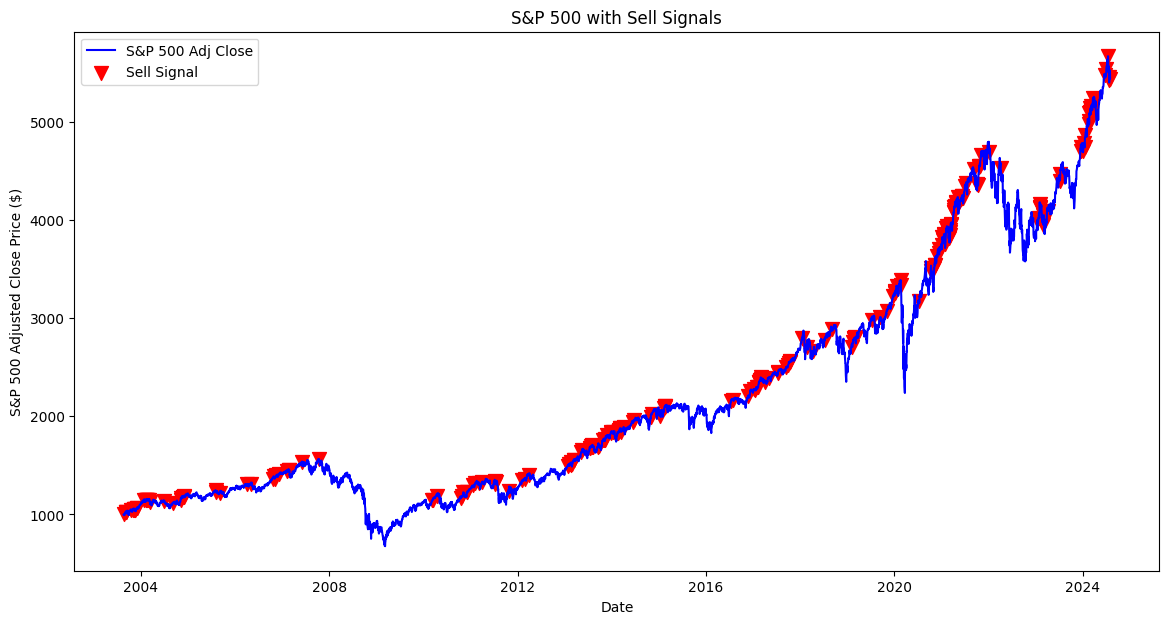

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Load the insider data CSV file with the correct delimiter
csv_file_name = "insider_data.csv"  # Replace with the actual name of your CSV file
insider_data = pd.read_csv(csv_file_name, delimiter=',')

# Convert filing_date to datetime format
insider_data['filing_date'] = pd.to_datetime(insider_data['filing_date'])

# Calculate the ratio of Number of Purchases to Number of Sales
insider_data['purchase_to_sale_ratio'] = insider_data['num_purchases'] / insider_data['num_sales']

# Identify sell signals where the ratio is <= 0.20
sell_signals = insider_data[insider_data['purchase_to_sale_ratio'] <= 0.20]

# Display the sell signals
print("Sell Signals:")
print(sell_signals[['filing_date', 'num_purchases', 'num_sales', 'purchase_to_sale_ratio']])

# Download S&P 500 data
sp500 = yf.download('^GSPC', start=sell_signals['filing_date'].min(), end=sell_signals['filing_date'].max())

# Ensure 'filing_date' is in datetime format for consistency
sell_signals['filing_date'] = pd.to_datetime(sell_signals['filing_date'])

# Reset index of sp500 to ensure merging on date
sp500.reset_index(inplace=True)

# Drop any existing 'Adj Close' in sell_signals to avoid duplication
if 'Adj Close' in sell_signals.columns:
    sell_signals = sell_signals.drop(columns=['Adj Close'])

# Merge S&P 500 data with sell signals
sell_signals = sell_signals.merge(sp500[['Date', 'Adj Close']], left_on='filing_date', right_on='Date', how='left')

# Plot the S&P 500 adjusted close prices
plt.figure(figsize=(14, 7))
plt.plot(sp500['Date'], sp500['Adj Close'], label='S&P 500 Adj Close', color='blue')

# Highlight sell signals
plt.scatter(sell_signals['filing_date'], sell_signals['Adj Close'], color='red', marker='v', s=100, label='Sell Signal')

# Add title and labels
plt.title('S&P 500 with Sell Signals')
plt.xlabel('Date')
plt.ylabel('S&P 500 Adjusted Close Price ($)')
plt.legend()

# Display the chart
plt.show()


We can see that using a conservative purchase/sale ratio of 0.20 or lower, the sell signals appear to occur mostly during the time when the S&P 500 is high. However, while the price is high when it sells, the insider sell signal does not show evidence of accurately timing market peaks, since we can see that the S&P 500 trends upwards most of the time. This suggests that while insider sales may indicate a cautious sentiment, they don't necessarily predict a market downturn, as the broader trend of the S&P 500 continues to rise despite these signals.